In [ ]:
import sys
from PySide.QtCore import *
from PySide.QtGui import *
from Demo_calculator_ui import Ui_MainWindow

from guiqwt.plot import CurveWidget
from guiqwt.builder import make
from guidata.configtools import get_icon

class MainWindow(QMainWindow, Ui_MainWindow):
    def __init__(self, parent=None):
        super(MainWindow, self).__init__(parent)
        self.setupUi(self)
 
        self.ConvertButton.clicked.connect(self.Convert) 
          
        self.MoneyInPutText.textChanged.connect(self.setzero)
   
    def Convert(self):
        if self.CurrencyComboBox.currentIndex() == 0 :
            self.MoneyOutPutText.setText( str(float(self.MoneyInPutText.text())*30) )
 
        else:
            self.MoneyOutPutText.setText( str(float(self.MoneyInPutText.text())/30) )
 
  
    def setzero(self):
        if len(self.MoneyInPutText.text()) == 0:
            self.MoneyInPutText.setText('0')


if __name__ == '__main__':
    #main()
    app = QApplication(sys.argv)
    frame = MainWindow()
    frame.show()    
    app.exec_()
    #sys.exit(0)
sys.exit(app.exec_())

In [ ]:
from PyQt4 import QtCore, QtGui
import sys

try:
    _fromUtf8 = QtCore.QString.fromUtf8
except AttributeError:
    def _fromUtf8(s):
        return s

try:
    _encoding = QtGui.QApplication.UnicodeUTF8
    def _translate(context, text, disambig):
        return QtGui.QApplication.translate(context, text, disambig, _encoding)
except AttributeError:
    def _translate(context, text, disambig):
        return QtGui.QApplication.translate(context, text, disambig)

class Ui_widget(QtGui.QWidget):
    def __init__(self):
        QtGui.QWidget.__init__(self)
        self.setupUi(self)        
        
    def setupUi(self, widget):
        widget.setObjectName(_fromUtf8("widget"))
        widget.resize(400, 300)
        self.horizontalLayout = QtGui.QHBoxLayout(widget)
        self.horizontalLayout.setObjectName(_fromUtf8("horizontalLayout"))
        self.verticalLayout = QtGui.QVBoxLayout()
        self.verticalLayout.setObjectName(_fromUtf8("verticalLayout"))
        self.printJosette_btm = QtGui.QPushButton(widget)
        self.printJosette_btm.setObjectName(_fromUtf8("printJosette_btm"))
        self.verticalLayout.addWidget(self.printJosette_btm)
        self.horizontalLayout.addLayout(self.verticalLayout)

        self.retranslateUi(widget)
        QtCore.QMetaObject.connectSlotsByName(widget)

    def retranslateUi(self, widget):
        widget.setWindowTitle(_translate("widget", "superJT", None))
        self.printJosette_btm.setText(_translate("widget", "PushButton", None))
        self.printJosette_btm.clicked.connect(self.printJosette)
        
    def printJosette(self):
        print ("Josette!!!")
        
if __name__ == '__main__':
    app = QtGui.QApplication(sys.argv)
    ex = Ui_widget()
    ex.show()
    sys.exit(app.exec_())

In [1]:
import sys
from PyQt4 import QtGui, QtCore
 
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt4agg import NavigationToolbar2QTAgg as NavigationToolbar
import matplotlib.pyplot as plt
import numpy as np
#import random
from scipy import signal
from matplotlib.widgets import Slider, Button, RadioButtons
 
class Window(QtGui.QDialog):
    def __init__(self, parent=None):
        super(Window, self).__init__(parent)
        self.resize(1000, 800)
        self.figure = plt.figure()
        self.canvas = FigureCanvas(self.figure)
 
         
        self.toolbar = NavigationToolbar(self.canvas, self)
        self.toolbar.hide()
 
        # Just some button 
        self.button = QtGui.QPushButton('Plot')
        self.button.clicked.connect(self.plot)
        
        self.button4 = QtGui.QPushButton('mag')
        self.button4.clicked.connect(self.mag)
        
        self.button5 = QtGui.QPushButton('phase')
        self.button5.clicked.connect(self.pha)
        
        self.button6 = QtGui.QPushButton('after')
        self.button6.clicked.connect(self.plotafter)
        
        #Slider = self.createSlider()
        
        #self.button1 = QtGui.QPushButton('Zoom')
        #self.button1.clicked.connect(self.zoom)
         
        #self.button2 = QtGui.QPushButton('Pan')
        #self.button2.clicked.connect(self.pan)
         
        #self.button3 = QtGui.QPushButton('Home')
        #self.button3.clicked.connect(self.home)
 
        # set the layout
        layout = QtGui.QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.toolbar)
        
        layout.addWidget(self.button)
        #layout.addWidget(self.button1)
        #layout.addWidget(self.button2)
        #layout.addWidget(self.button3)
        layout.addWidget(self.button4)
        layout.addWidget(self.button5)
        layout.addWidget(self.button6)
        #layout.addWidget(Slider)
        self.setLayout(layout)
        
        #Slider.setValue(0 * 30)
    #def home(self):
        #self.toolbar.home()
    #def zoom(self):
        #self.toolbar.zoom()
    #def pan(self):
        #self.toolbar.pan()
        
    def mag(self):
        #t = np.linspace(0, 2*np.pi, 500)
        #x = 1 + 2.5*np.cos(10*t)
        #xf = np.fft.fft(x, n=512)
        #data = abs(xf)
        #ax = self.figure.add_subplot(232)
        #ax.hold(False)
        #ax.plot(data, '-')
        #self.canvas.draw()
        
        w, h = signal.freqz(np.array([1, -1]), 1, worN=np.linspace(-np.pi, np.pi, 100))
        ax = self.figure.add_subplot(232)
        ax.hold(False)
        plt.plot(w, abs(h))
        plt.xlim(np.min(w), np.max(w))
        self.canvas.draw()
        
    def pha(self):
        w, h = signal.freqz(np.array([1, -1]), 1, worN=np.linspace(-np.pi, np.pi, 100))
        ax = self.figure.add_subplot(235)
        ax.hold(False)
        plt.plot(w, np.angle(h))
        plt.xlim(np.min(w), np.max(w))
        plt.grid()
        self.canvas.draw()
    
    def plotafter(self):
        w, h = signal.freqz(np.array([1, -1]), 1, worN=np.linspace(-np.pi, np.pi, 100))
        ax = self.figure.add_subplot(233)
        ax.hold(False)
        plt.plot(w, h)
        self.canvas.draw()
    
    def plot(self):
        """
        t = np.linspace(0, 2*np.pi, 500)
        data = 1 + 2.5*np.cos(10*t)
        ax = self.figure.add_subplot(231)
        ax.hold(False)
        ax.plot(data, '-')
        self.canvas.draw()"""
        t = np.arange(0.0, 1.0, 0.001)
        a0 = 5
        f0 = 3
        s = a0*np.sin(2*np.pi*f0*t)
        ax = self.figure.add_subplot(231)
        plt.plot(t,s)
        #plt.axis([0, 1, -10, 10])
        self.canvas.draw()
    
if __name__ == '__main__':
    app = QtGui.QApplication(sys.argv)
 
    main = Window()
    main.setWindowTitle('Simple QTpy and MatplotLib example with Zoom/Pan')
    main.show()
 
    sys.exit(app.exec_())

C:\Python27\lib\site-packages\numpy\core\numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


SystemExit: 0

To exit: use 'exit', 'quit', or Ctrl-D.


In [3]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

#n = 101
#a = signal.firwin(n, cutoff = 0.3, window = "hamming")
b = signal.firwin(80, 0.5, window=('kaiser', 8))
#plt.plot(abs(a))
w, h = signal.freqz(b)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.show()

(-3.1415926535897931, 3.1415926535897931)

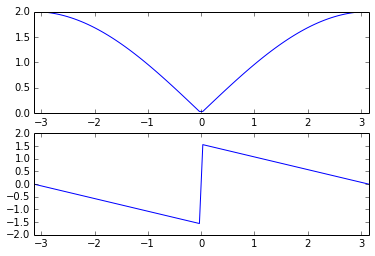

In [46]:
%matplotlib inline
w, h = signal.freqz(np.array([1, -1]), 1, worN=np.linspace(-np.pi, np.pi, 100))
plt.subplot(211)
plt.plot(w, abs(h))
plt.xlim(np.min(w), np.max(w))
plt.subplot(212)
plt.plot(w, np.angle(h))
plt.xlim(np.min(w), np.max(w))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t,s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp  = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

In [1]:
import sys
from PyQt4 import QtGui
 
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt4agg import NavigationToolbar2QTAgg as NavigationToolbar
import matplotlib.pyplot as plt
import numpy as np
#import random
from scipy import signal
 
class Window(QtGui.QDialog):
    def __init__(self, parent=None):
        super(Window, self).__init__(parent)
        self.resize(1000, 800)
        self.figure = plt.figure()
        self.canvas = FigureCanvas(self.figure)
 
         
        self.toolbar = NavigationToolbar(self.canvas, self)
        self.toolbar.hide()
 
        # Just some button 
        self.button = QtGui.QPushButton('Plot')
        self.button.clicked.connect(self.plot)
        
        self.button4 = QtGui.QPushButton('mag')
        self.button4.clicked.connect(self.mag)
        
        self.button5 = QtGui.QPushButton('phase')
        self.button5.clicked.connect(self.pha)
        
        self.button6 = QtGui.QPushButton('after')
        self.button6.clicked.connect(self.plotafter)
        

        #Slider = self.createSlider()
        
        #self.button1 = QtGui.QPushButton('Zoom')
        #self.button1.clicked.connect(self.zoom)
         
        #self.button2 = QtGui.QPushButton('Pan')
        #self.button2.clicked.connect(self.pan)
         
        #self.button3 = QtGui.QPushButton('Home')
        #self.button3.clicked.connect(self.home)
 
        # set the layout
        layout = QtGui.QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.toolbar)
        
        layout.addWidget(self.button)
        #layout.addWidget(self.button1)
        #layout.addWidget(self.button2)
        #layout.addWidget(self.button3)
        layout.addWidget(self.button4)
        layout.addWidget(self.button5)
        layout.addWidget(self.button6)
        #layout.addWidget(Slider)

        self.setLayout(layout)
        
        #Slider.setValue(0 * 30)
    #def home(self):
        #self.toolbar.home()
    #def zoom(self):
        #self.toolbar.zoom()
    #def pan(self):
        #self.toolbar.pan()
        
    def mag(self):
        #t = np.linspace(0, 2*np.pi, 500)
        #x = 1 + 2.5*np.cos(10*t)
        #xf = np.fft.fft(x, n=512)
        #data = abs(xf)
        #ax = self.figure.add_subplot(232)
        #ax.hold(False)
        #ax.plot(data, '-')
        #self.canvas.draw()
        
        w, h = signal.freqs(np.array([1]), np.array([1, 2]), worN=np.linspace(-50, 50, 1000))
        ax = self.figure.add_subplot(232)
        ax.hold(False)
        plt.plot(w, abs(h))
        plt.xlim(np.min(w), np.max(w))
        plt.grid()
        self.canvas.draw()
        
    def pha(self):
        w, h = signal.freqs(np.array([1]), np.array([1, 2]), worN=np.linspace(-50, 50, 1000))
        ax = self.figure.add_subplot(235)
        ax.hold(False)
        plt.plot(w, np.angle(h))
        plt.xlim(np.min(w), np.max(w))
        plt.grid()
        self.canvas.draw()
    
    def plotafter(self):
        w, h = signal.freqs(np.array([1]), np.array([1, 2]), worN=np.linspace(-50, 50, 1000))
        ax = self.figure.add_subplot(233)
        ax.hold(False)
        plt.plot(w, h)
        self.canvas.draw()
    
    def plot(self):
        """
        t = np.linspace(0, 2*np.pi, 500)
        data = 1 + 2.5*np.cos(10*t)
        ax = self.figure.add_subplot(231)
        ax.hold(False)
        ax.plot(data, '-')
        self.canvas.draw()"""
        t = np.arange(-0.1, 0.1, 0.001)
        a0 = 3
        #f0 = 3
        s = a0*np.cos(2*np.pi*t - np.pi)
        ax = self.figure.add_subplot(231)
        plt.plot(t,s)
        plt.xlim(np.min(t), np.max(t))
        self.canvas.draw()
    
if __name__ == '__main__':
    app = QtGui.QApplication(sys.argv)
 
    main = Window()
    main.setWindowTitle('Simple QTpy and MatplotLib example with Zoom/Pan')
    main.show()
 
    sys.exit(app.exec_())

C:\Python27\lib\site-packages\numpy\core\numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


SystemExit: 0

To exit: use 'exit', 'quit', or Ctrl-D.


In [1]:
import sys
from PyQt4 import QtGui
 
from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt4agg import NavigationToolbar2QTAgg as NavigationToolbar
import matplotlib.pyplot as plt
import numpy as np
#import random
from scipy import signal

class Window(QtGui.QDialog):
    def __init__(self, parent=None):
        super(Window, self).__init__(parent)

        self.resize(1000, 800)
        self.figure = plt.figure()
        self.canvas = FigureCanvas(self.figure)
        
        self.toolbar = NavigationToolbar(self.canvas, self)
        self.toolbar.hide()
                       
        # Just some button 
        self.button = QtGui.QPushButton('Plot')
        self.button.clicked.connect(self.plot)
        
        # set the layout
        layout = QtGui.QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.toolbar)
        layout.addWidget(self.button)
        
        self.setLayout(layout)
    
        
    def showDialog(self):
        
        d, ok = QtGui.QInputDialog.getDouble(self, 'Input Dialog','Enter offset:',0 ,-100, 100, 2)
        a, ok = QtGui.QInputDialog.getDouble(self, 'Input Dialog','Enter amplitude:',0 ,-100, 100, 2)
        if ok:
            return d, a
           
    def plot(self):        
        d, a = self.showDialog()
        t = np.linspace(0, 2*np.pi, 500)
        data = d + a*np.cos(5*t)
        """t = np.arange(-0.1, 0.1, 0.001)
        a0 = d
        s = a0*np.cos(2*np.pi*t - np.pi)"""
        ax = self.figure.add_subplot(231)
        ax.hold(False)
        plt.plot(t, data)
        plt.xlim(np.min(t), np.max(t))
        #self.canvas.updateGeometry()
        self.canvas.draw()     
    

if __name__ == '__main__':
    app = QtGui.QApplication(sys.argv)
 
    main = Window()
    main.setWindowTitle('Simple QTpy and MatplotLib example with Zoom/Pan')
    main.show()
    
    sys.exit(app.exec_())

SystemExit: 0

To exit: use 'exit', 'quit', or Ctrl-D.
